#### Imports

In [1]:
# Visualization
import matplotlib.pyplot as plt

# Builtin
from pathlib import Path
import sys
import os
import pdb


# Add repo path to system path for additional imports. 
# Note the relative depth from this notebook to system repo
# in case you want to move this file

nb_path = str(Path(os.path.abspath('')).parent.parent)
sys.path.insert(0, nb_path)
print(f'Added {nb_path} to system path')

# This computer git repos
from project.project_manager_module import ProjectManager

Added C:\Users\Simo\Laskenta\Git_Repos\SystemTools to system path


#### Build paths
<font color=red>**Set the root_path**</font>

In [2]:
#root_path = r"/opt2/Git_Repos/SystemTools/scripts/"
root_path = r"C:\Users\Simo\Laskenta\Git_Repos\SystemTools\scripts/"

In [3]:
project = "FCN22"  
experiment = "Figure6"  
experiment_path = Path.joinpath(Path(root_path), Path(project), experiment)

#### Data context for multiple analyzes and visualizations

In [4]:
to_spa_dict = {
    "startpoints": ["Comrad"],
    "parameters": ["VT"],
    "analyzes": [
        "Coherence",
        "Granger Causality",
        "Transfer Entropy",
        "Simulation Error",
        "Excitatory Firing Rate",
        "Inhibitory Firing Rate",
    ],
}

#### Call project manager
Code complexity is hidden behind the ProjectManager

In [5]:
PM = ProjectManager(
    path=experiment_path,
    input_folder="../in",
    output_folder="",
    matlab_workspace_file="",
    conn_skeleton_file_in="",
    conn_file_out="",
    input_filename="",
    NG_name="NG3_L4_SS_L4",
    t_idx_start=2000,
    t_idx_end=-2000,
    to_spa_dict=to_spa_dict,
    project=project,
    experiment=experiment,
)

#### Copy precalculated results to experiment folders

In [6]:
input_folder_list = [
    "precalculated_results/Single_narrow_iterations_R1/Comrad_VT_compiled_results", 
]
# These will appear under experiment_path
output_folder_list = [
    "Comrad_VT_compiled_results",
]
for this_input, this_output in zip(input_folder_list, output_folder_list):
    PM.transfer_precalculated_results(input_folder=this_input, output_folder=this_output)

### Vizualize mean of 10 iterations, results precalculated

In [7]:
current_data = "Comrad_VT_compiled_results"

In [8]:
PM.context.output_folder = experiment_path.joinpath(current_data)

<font color=red>**Activate the following cell to save figures**</font>

In [9]:
#PM.viz.save_figure_to_folder = f"Analysis_Figures"
#PM.viz.save_figure_with_arrayidentifier = f"Fig6A_{current_data.replace('_compiled_results','')}"

Creating one figure for each neuron group


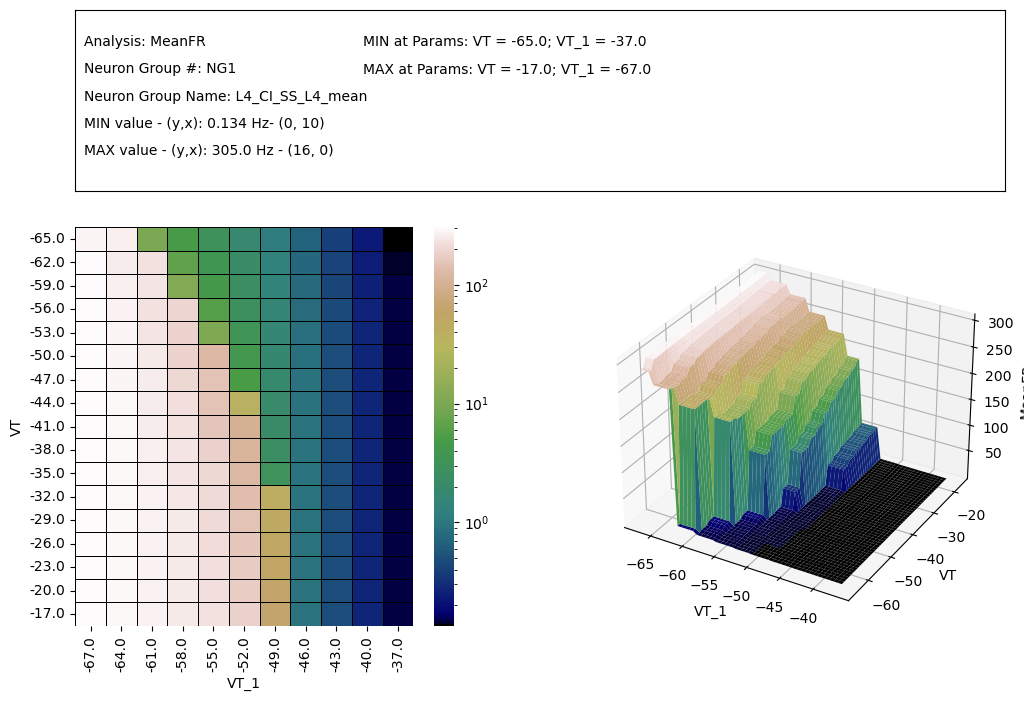

In [10]:
PM.viz.show_analyzed_arrayrun(
    csv_filename="MeanFR_mean.csv",
    analysis="MeanFR",
    variable_unit="Hz",
    logscale=True,
    annotation_2D=False,
    NG_id_list=['NG1'],
)

In [11]:
csv_filename = "Coherence_GrCaus_NormError_TransferEntropy_mean.csv"

All neuron groups requested


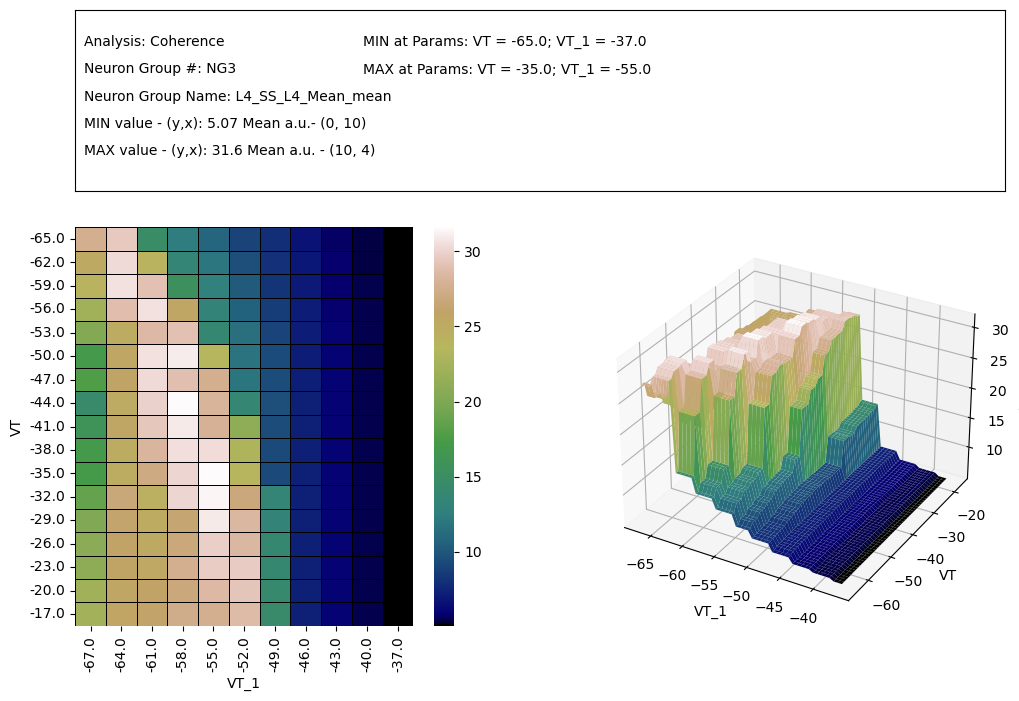

In [12]:
PM.viz.show_analyzed_arrayrun(
        csv_filename=csv_filename,
        analysis="Coherence",
        variable_unit="Mean a.u.",
        annotation_2D=False,
    )

Creating one figure for each analysis
All neuron groups requested


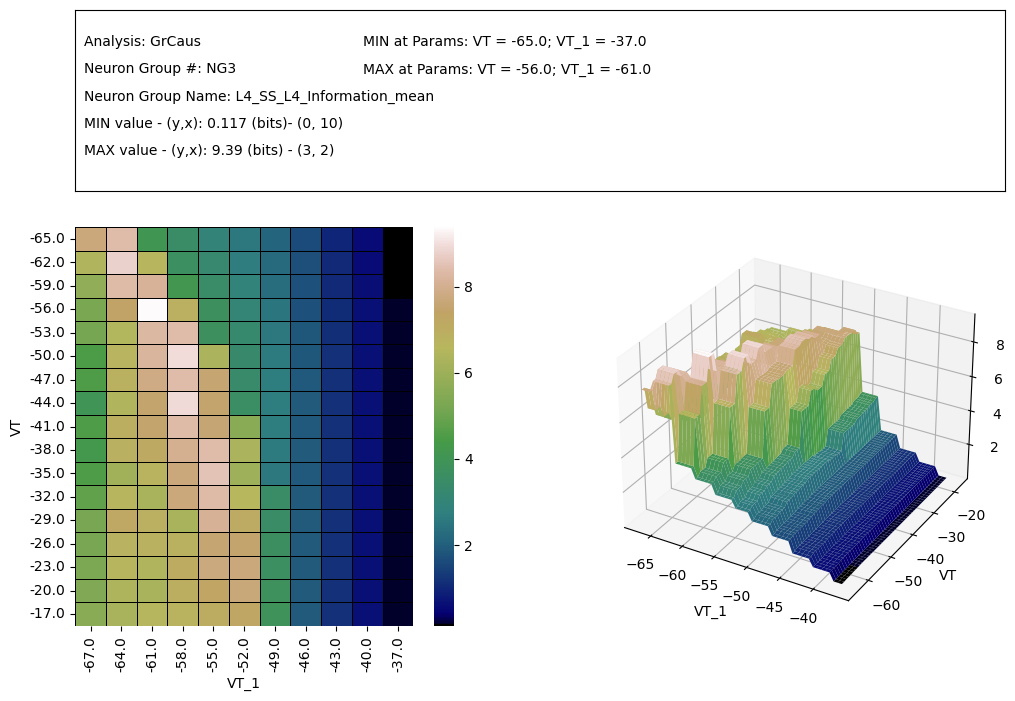

In [13]:
PM.viz.show_analyzed_arrayrun(
        csv_filename=csv_filename,
        analysis="GrCaus",
        variable_unit="bit",
        annotation_2D=False,
    )

All neuron groups requested


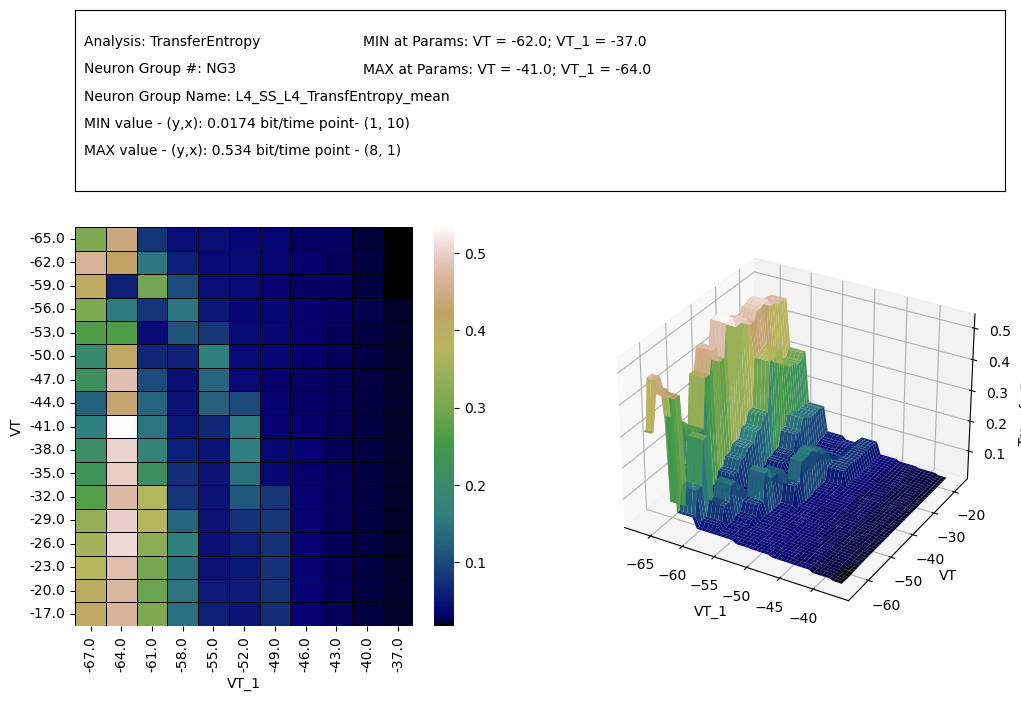

In [14]:
PM.viz.show_analyzed_arrayrun(
        csv_filename=csv_filename,
        analysis="TransferEntropy",
        variable_unit="bit/time point",
        annotation_2D=False,
    )

All neuron groups requested


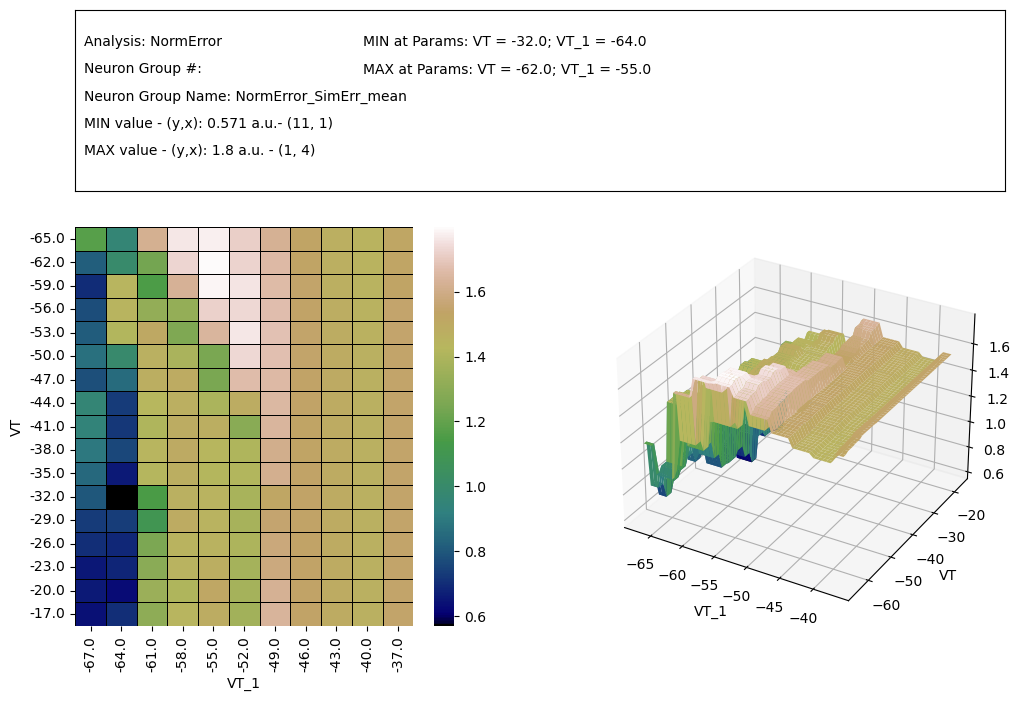

In [15]:
PM.viz.show_analyzed_arrayrun(
        csv_filename=csv_filename,
        analysis="NormError",
        variable_unit="a.u.",
        annotation_2D=False,
    )

In [16]:
#PM.viz.save_figure_with_arrayidentifier = f"Fig6D_{current_data.replace('_compiled_results','')}"
#plt.rcParams['figure.figsize'] = (16, 4)

### Figure 6D

In [17]:
csv_filename = "Coherence_GrCaus_NormError_TransferEntropy_IxO_accuracy.csv"

All neuron groups requested


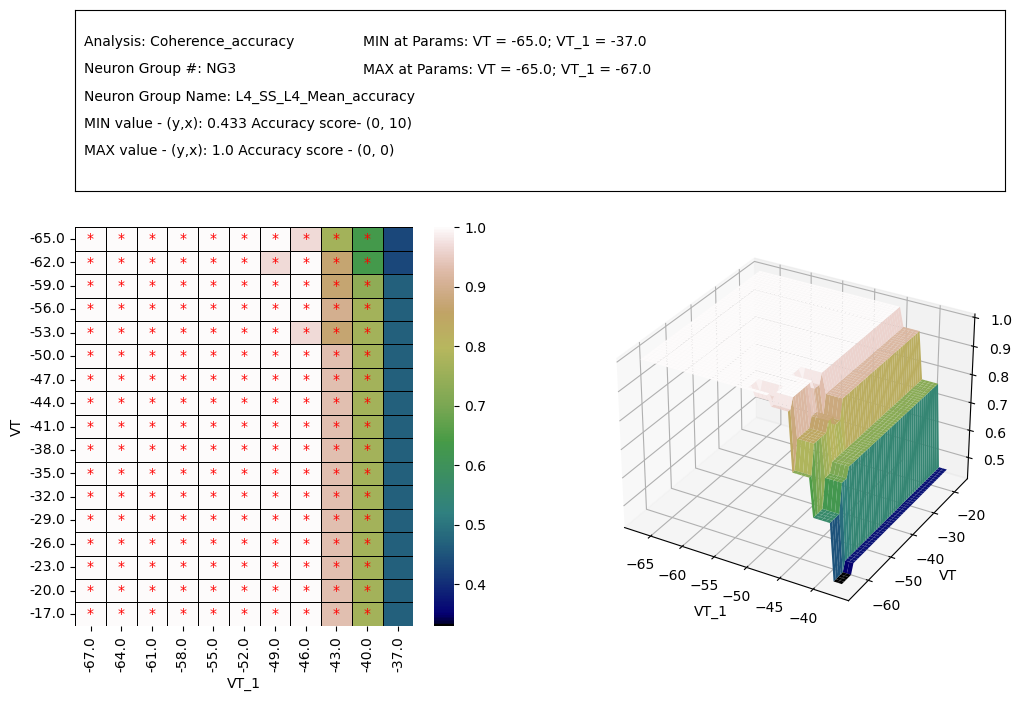

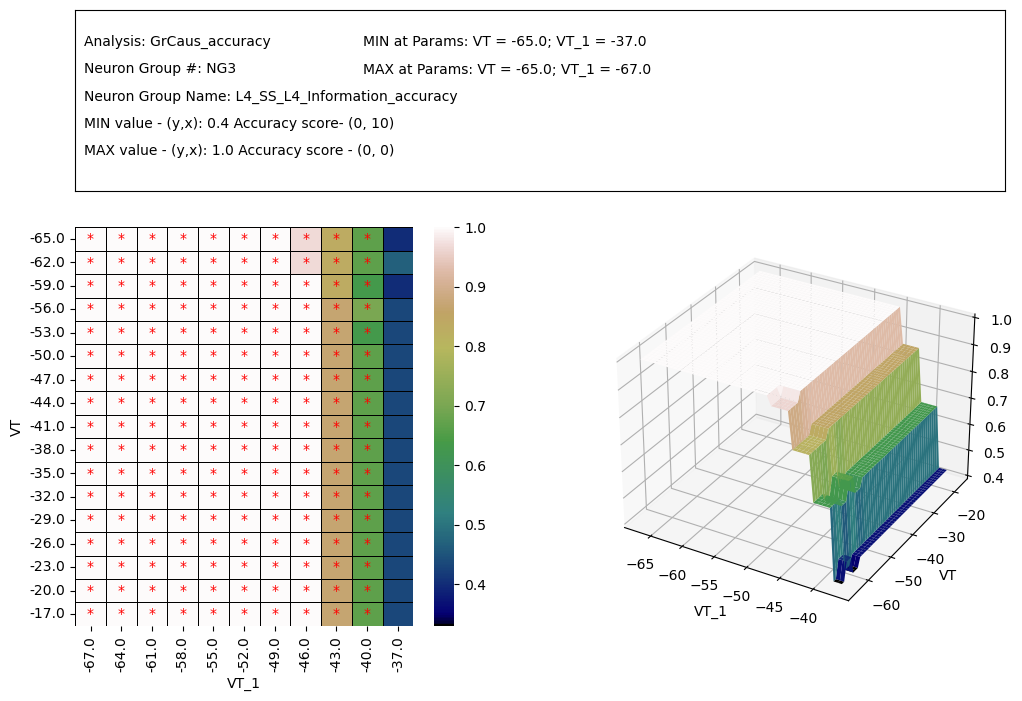

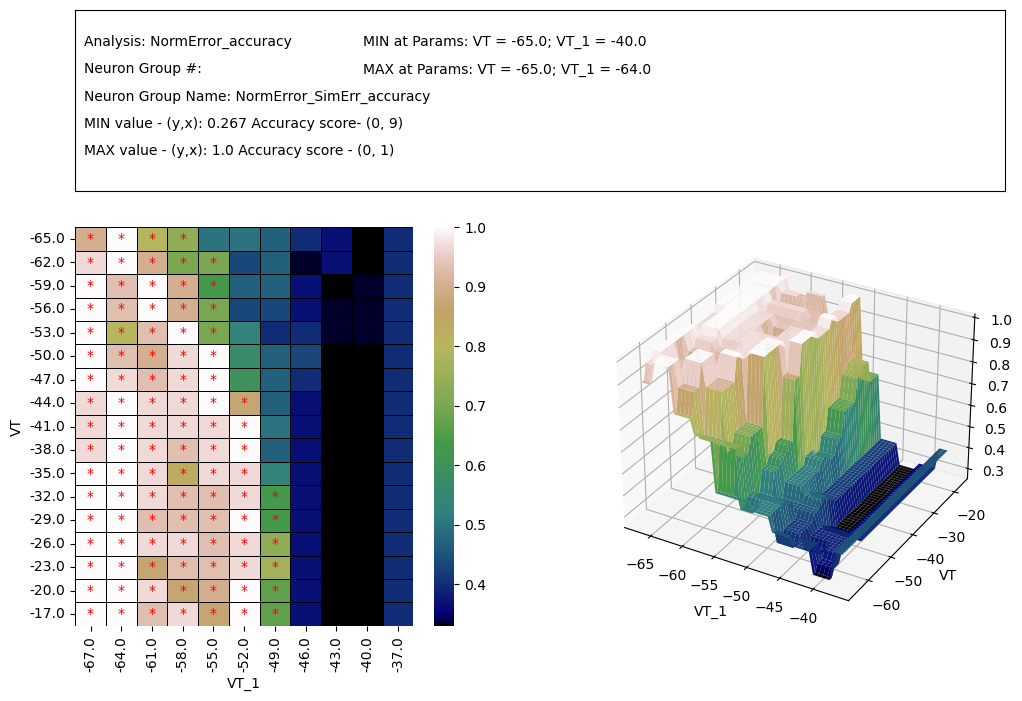

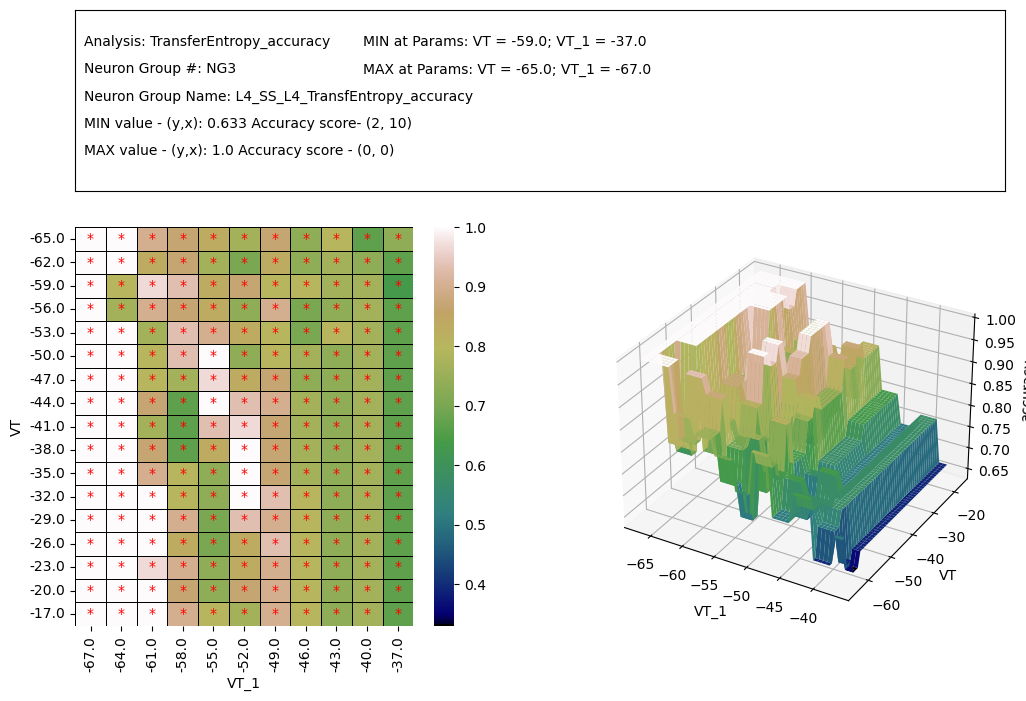

In [18]:
PM.viz.show_analyzed_arrayrun(
        csv_filename=csv_filename,
        analysis="accuracy",
        variable_unit="Accuracy score",
        annotate_with_p=True,
    )